In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl

from mogwai.data_loading import NPZ_MSADataModule
from mogwai.models import GremlinPseudolikelihood
from mogwai.plotting import plot_colored_preds_on_trues
from mogwai.utils import apc

In [2]:
# Load npz msa
msa_dm = NPZ_MSADataModule("data/test/3er7_1_A.npz", batch_size=4096)
msa_dm.setup()

# Initialize model
model = GremlinPseudolikelihood(msa_dm.num_seqs, msa_dm.msa_length, msa_dm.msa_counts, true_contacts=msa_dm.true_contacts)

# Initialize Trainer
trainer = pl.Trainer(min_steps=50, max_steps=50, gpus=1)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


MSA has shape (33672, 118, 20)



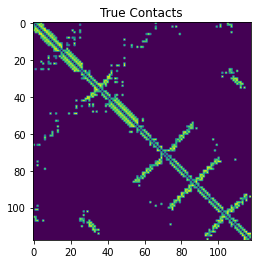

In [3]:
# Show info about family
print(f"MSA has shape {tuple(msa_dm.dims)}\n")

plt.imshow(msa_dm.true_contacts)
plt.title("True Contacts")
plt.show()

In [4]:
# Train model
trainer.fit(model, msa_dm)


  | Name | Type | Params
------------------------------
Epoch 5:  56%|█████▌    | 5/9 [00:00<00:00,  6.58it/s, loss=168.014, v_num=28, auc=0.729, auc_apc=0.734, max_auc=0.723, delta_auc=0.00371]


1

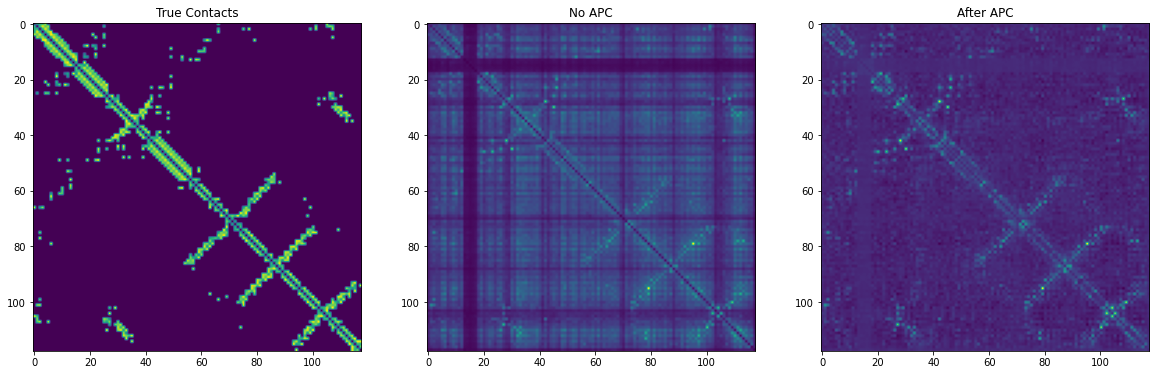

In [5]:
# Plot the contacts from the model

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.imshow(msa_dm.true_contacts)
plt.title("True Contacts")

plt.subplot(132)
contacts = model.get_contacts()
plt.imshow(contacts)
plt.title("No APC")


plt.subplot(133)
plt.imshow(apc(contacts))
plt.title("After APC")
plt.show()

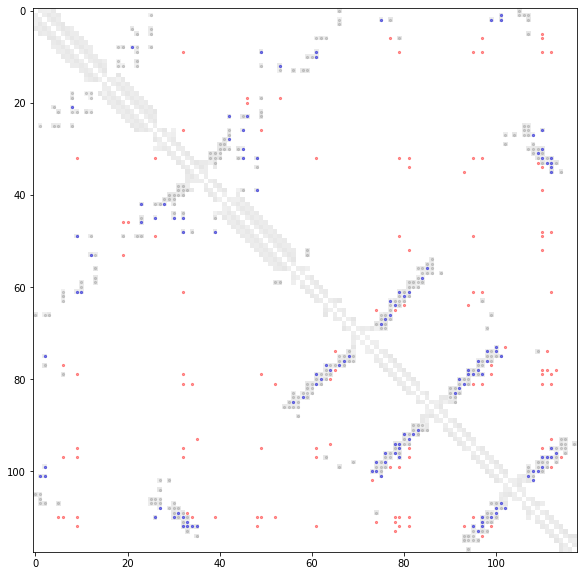

In [7]:
plt.figure(figsize=(10,10))
plot_colored_preds_on_trues(contacts, msa_dm.true_contacts, point_size=5)
plt.show()